#### Principle coordinate analysis and permanova on microbiome data
---

In [2]:

#setworking directory to AbioticAraMicrobe/
setwd('../')

In [1]:
getwd()

[1] "/Users/mahmoudi/Documents/Doc/2023/EnvironmentalFactprs/github/AbioticAraMicrobe/scripts"

In [3]:
#load packages
library(vegan)
library(ggplot2)
library(phyloseq)
library(gridExtra)
library(munsell)
library(colorspace)


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-2


Attaching package: ‘colorspace’


The following object is masked from ‘package:munsell’:

    desaturate




[1] "#1F77B4" "#FF7F0E" "#2CA02C" "#D62728" "#9467BD" "#8C564B" "#E377C2"
 [8] "#7F7F7F" "#BCBD22" "#17BECF"

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
[8] "#666666"

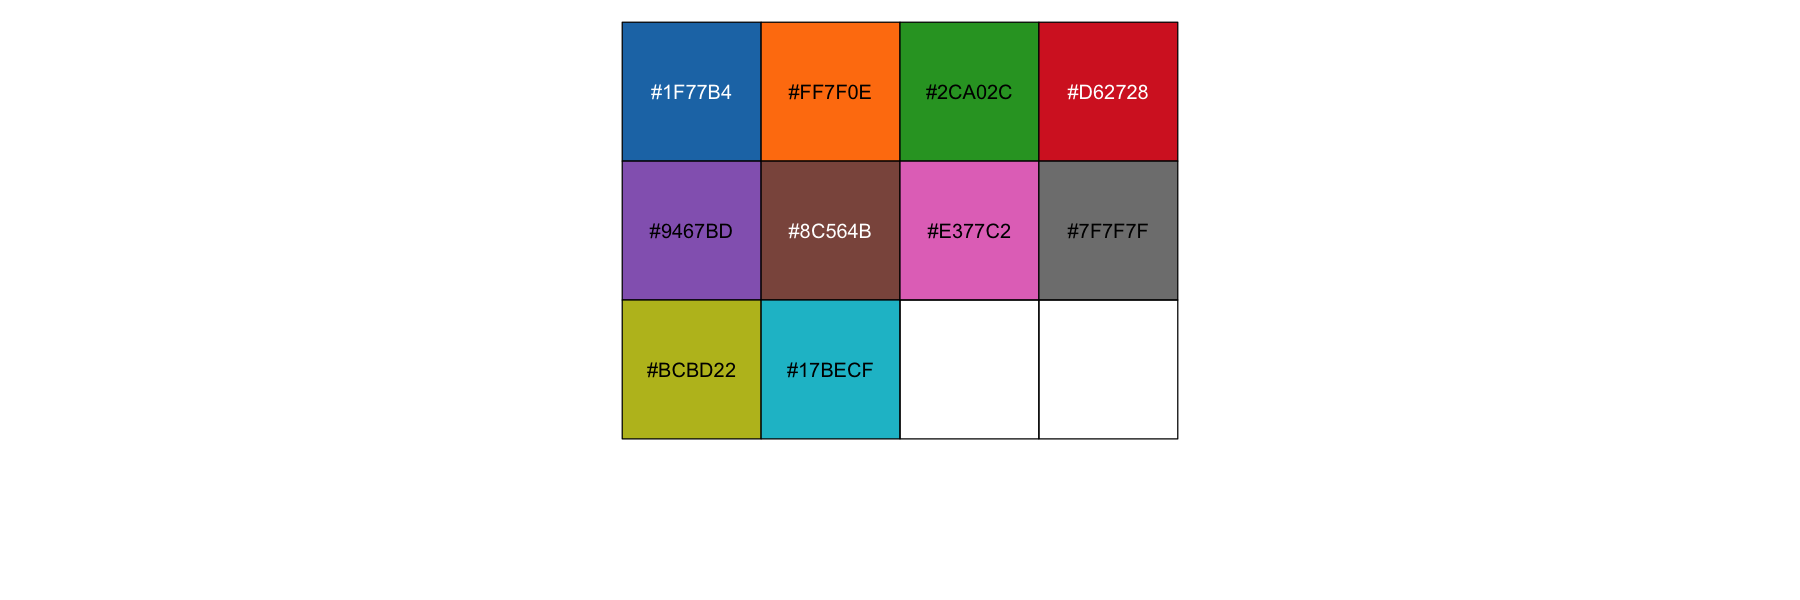

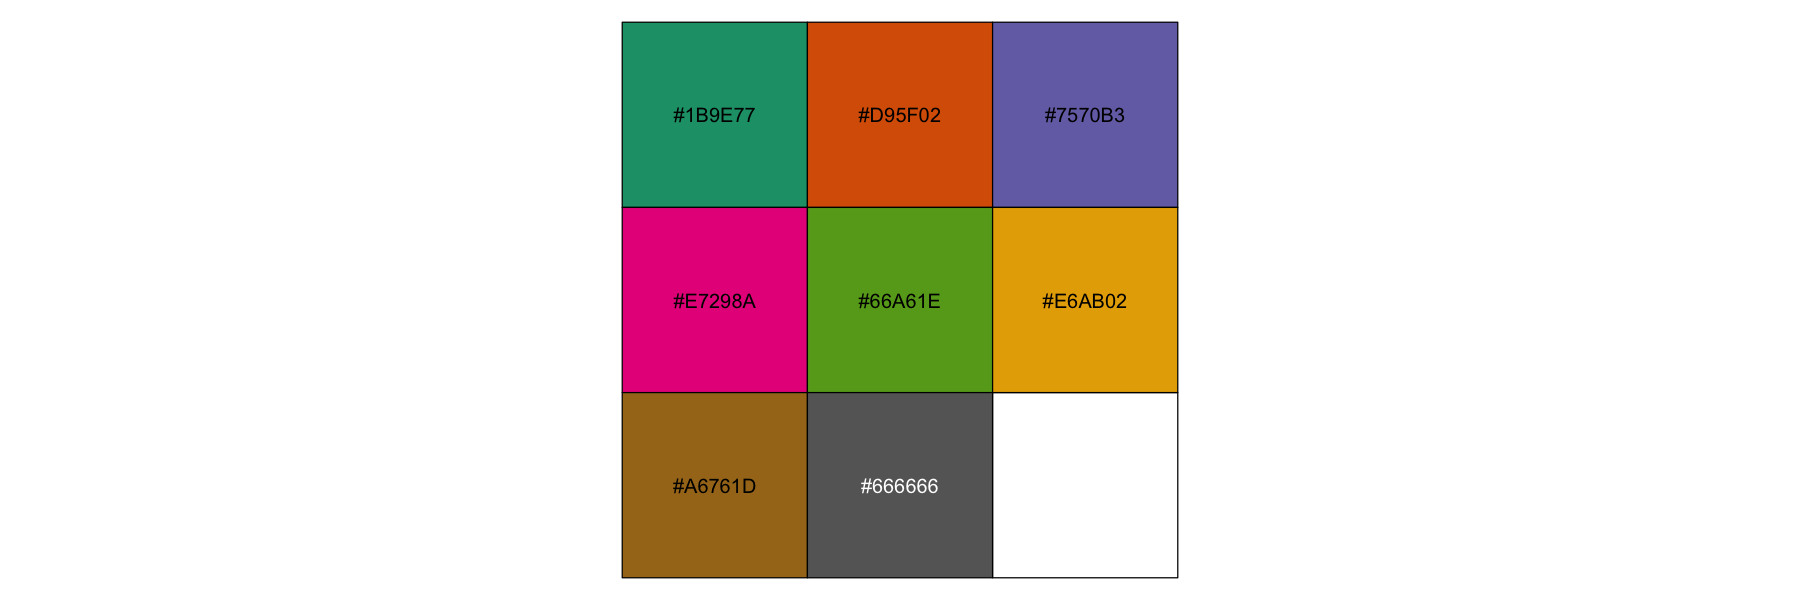

In [30]:
#palette <- qualitative_hcl(n = 6)

#plot(1:length(palette), rep(1, length(palette)), col = palette, pch = 16, cex = 5, ylim = c(0, 2), xlim = c(0, length(palette)+1), xlab = "", ylab = "")

x = palette.colors(palette = "classictableau")
x

scales::show_col(x)

x1 = palette.colors(palette = "dark2")
x1

scales::show_col(x1)

#### Permanova analysis and pcoa on bacteria
----

In [4]:
#permanova
plot_list = list() # list for saving plot
color = c('x','#1B9E77' , '#D95F02','#7570B3' ,  '#BCBD22','#1F77B4'  , '#E377C2', '#66A61E','#E6AB02','#A6761D','#666666') #color for pcoa plot
#---------------------------------------------------------------------------------------------
#open otu table and make log 10 transfer on on relative abundance table
Otu1 = read.table("Data/DataClean/BV5Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu000002') 
n
sam_otu = Otu1[-c(1:14)] #n-1
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 

sam_otuRA <- decostand(sam_otu, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA = log10(sam_otuRA + 1)
identical(row.names(sample),row.names(sam_otuRA)) 
#convert files to phyloseq form
samples <- sample_data(sample)
otusam <- otu_table(sam_otuRA , taxa_are_rows = FALSE,errorIfNULL = TRUE)
file <- phyloseq(otusam,samples)

[1] 15

[1] TRUE

[1] TRUE

In [ ]:
#permanova using adonis2
sample[, c("Season" , "Compartment" , "Site")] <- lapply( sample[, c("Season" , "Compartment" , "Site")] , factor )
ado1 = adonis2(sam_otuRA  ~ sample$Season * sample$Compartment * sample$Site, permutations = 10000, method = 'bray' , parallel = 4) 
ado1tab = as.data.frame(ado1)
ado1tab$R2percentage = round(ado1tab$R2 ,digits = 3) * 100
ado1tab$percentageleft = 100-ado1tab$R2percentage
ado1tabB <- ado1tab
ado1tabB$Taxa <- 'Bacteria'
ado1tabB

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


[1] "Bacterial pcoa plots"


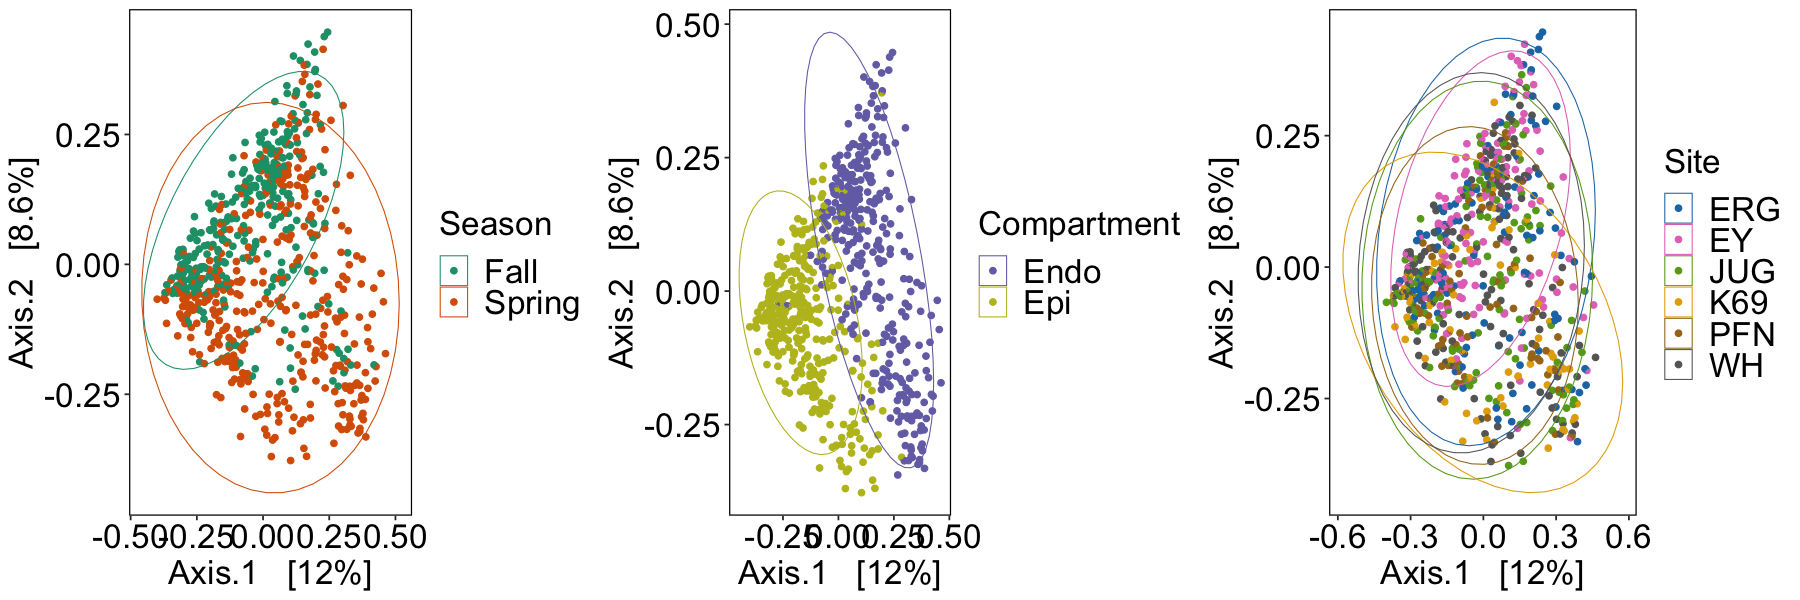

In [5]:
#pcoa plots
Variable <- c("Season" , "Compartment" , "Site")
methods <- c('PCoA')
counter = 0
for (method in methods){
  file.ord <- ordinate(file,method, "bray") 
  for (i in 1:length(Variable)){
    counter = counter + 1
    color1 = color[c((counter*2):length(color))]
    p = plot_ordination(file, file.ord, type="Samples", color=Variable[i]) + 
      theme_bw()+ 
      theme(legend.text = element_text(colour="black", size = 20) ,
            legend.title = element_text(face = NULL),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            text = element_text(size = 20) ,
            panel.border = element_rect(colour = "black", fill=NA, linewidth=0.7) ,
            axis.title.x = element_text(colour = "black" , size = 20) , 
            axis.text.x = element_text(colour = "black" , size = 20) , 
            axis.text.y = element_text(colour = "black" , size = 20) , 
            axis.title.y = element_text(colour = "black" ,size = 20),
            strip.text = element_text(colour = "black" ,size = 20)) + geom_point( size = 0.5) +
      scale_color_manual(values = color1) 
    p1 = p + stat_ellipse(aes_string(fill=Variable[i] , size = 3),geom = "polygon", type="t", alpha=0 , size = 0.3)  
    plot_list[[counter]] <- p1
  }
}

options(repr.plot.width=15, repr.plot.height=5)
print('Bacterial pcoa plots')
grid.arrange(grobs = plot_list[c(1:3)], nrow = 1, ncol = 3 , align="hv" )

#### Permanova analysis and pcoa on fungal
----

In [6]:
#permanova

#open otu table and make log 10 transfer on on relative abundance table
Otu1 = read.table("data/DataClean/FITS2Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu00002') 
n

sam_otu = Otu1[-c(1:14)] #n-1
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 

sam_otuRA <- decostand(sam_otu, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA = log10(sam_otuRA + 1)
identical(row.names(sample),row.names(sam_otuRA))

#convert files to phyloseq form
samples <- sample_data(sample)
otusam <- otu_table(sam_otuRA , taxa_are_rows = FALSE,errorIfNULL = TRUE)
file <- phyloseq(otusam,samples)

[1] 15

[1] TRUE

[1] TRUE

In [27]:
#####adonis
sample[, c("Season" , "Compartment" , "Site")] <- lapply( sample[, c("Season" , "Compartment" , "Site")] , factor )
ado1 = adonis2(sam_otuRA  ~ sample$Season * sample$Compartment * sample$Site, permutations = 10000, method = 'bray' , parallel = 4) 
ado1tab = as.data.frame(ado1)
ado1tab$R2percentage = round(ado1tab$R2 ,digits = 3) * 100
ado1tab$percentageleft = 100-ado1tab$R2percentage
ado1tabF <- ado1tab
ado1tabF$Taxa <- 'Fungi'
ado1tabF

[1] 15

[1] TRUE

[1] TRUE

,Df,SumOfSqs,R2,F,Pr(>F),R2percentage,percentageleft,Taxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sample$Season,1,4.2117440,0.014759193,11.128768,0.00009999,1.5,98.5,Fungi
sample$Compartment,1,5.2759765,0.018488578,13.940809,0.00009999,1.8,98.2,Fungi
sample$Site,5,12.9277746,0.045302736,6.831859,0.00009999,4.5,95.5,Fungi
sample$Season:sample$Compartment,1,0.6997363,0.002452082,1.848926,0.00479952,0.2,99.8,Fungi
sample$Season:sample$Site,5,4.9376307,0.017302915,2.609358,0.00009999,1.7,98.3,Fungi
sample$Compartment:sample$Site,5,3.2453701,0.011372734,1.715060,0.00009999,1.1,98.9,Fungi
sample$Season:sample$Compartment:sample$Site,5,2.3929354,0.008385551,1.264579,0.01339866,0.8,99.2,Fungi
Residual,665,251.6729367,0.881936211,NA,NA,88.2,11.8,Fungi
Total,688,285.3641042,1.000000000,NA,NA,100.0,0.0,Fungi


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


[1] "Fungal pcoa plots"


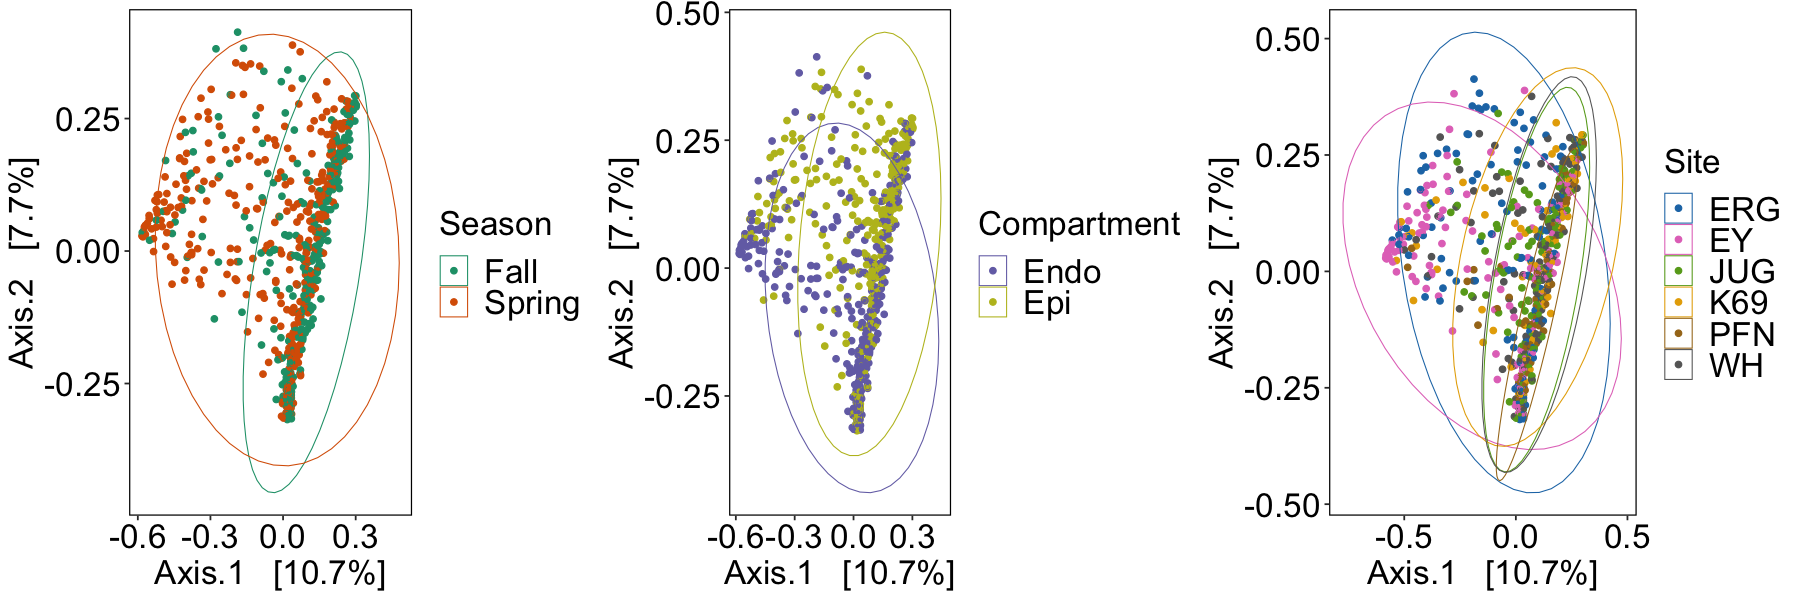

In [7]:
#pcoa plots

Variable <- c("Season" , "Compartment" , "Site")
methods <- c('PCoA')
counter = 3
c = 0
for (method in methods){
  file.ord <- ordinate(file,method, "bray") 
  for (i in 1:length(Variable)){
    counter = counter + 1
    c = c + 1
    color1 = color[c((c*2):length(color))]
    p = plot_ordination(file, file.ord, type="Samples", color=Variable[i]) + 
      theme_bw()+ 
      theme(legend.text = element_text(colour="black", size = 20),
            legend.title = element_text(face = NULL),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            text = element_text(size = 20),
            panel.border = element_rect(colour = "black", fill=NA, size=0.7) ,
            axis.title.x = element_text(colour = "black" , size = 20) , 
            axis.text.x = element_text(colour = "black" , size = 20) , 
            axis.text.y = element_text(colour = "black" , size = 20) , 
            axis.title.y = element_text(colour = "black" ,size = 20),
            strip.text = element_text(colour = "black" ,size = 20)) + geom_point( size = 0.5) +
      scale_color_manual(values = color1) 
    p1 = p + stat_ellipse(aes_string(fill=Variable[i] , size = 3),geom = "polygon", type="t", alpha=0 , size = 0.3)  
    plot_list[[counter]] <- p1
  }
}

options(repr.plot.width=15, repr.plot.height=5)
print('Fungal pcoa plots')
grid.arrange(grobs = plot_list[c(4:6)], nrow = 1, ncol = 3 , align="hv" )

#### Permanova analysis and pcoa on eukaryotes
----

In [8]:
#permanova

#open otu table and make log 10 transfer on on relative abundance table

Otu1 = read.table("data/DataClean/PV9Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
n = which(colnames(Otu1)=='Otu00002') 
n

sam_otu = Otu1[-c(1:14)] #n-1
sam_otu = sam_otu[rowSums(sam_otu)!=0,]
sample = Otu1[c(1:14)] #n-1
sample = sample[rownames(sample) %in% rownames(sam_otu),]
identical(row.names(sample),row.names(sam_otu)) 

sam_otuRA <- decostand(sam_otu, method="total", MARGIN=1)   ###Relative abundance
sam_otuRA = log10(sam_otuRA + 1)
identical(row.names(sample),row.names(sam_otuRA)) 
#convert files to phyloseq form
samples <- sample_data(sample)
otusam <- otu_table(sam_otuRA , taxa_are_rows = FALSE,errorIfNULL = TRUE)
file <- phyloseq(otusam,samples)

[1] 15

[1] TRUE

[1] TRUE

In [32]:
#permanova using adonis2
sample[, c("Season" , "Compartment" , "Site")] <- lapply( sample[, c("Season" , "Compartment" , "Site")] , factor )
ado1 = adonis2(sam_otuRA  ~ sample$Season * sample$Compartment * sample$Site, permutations = 10000, method = 'bray' , parallel = 4) 
ado1tab = as.data.frame(ado1)
ado1tab$R2percentage = round(ado1tab$R2 ,digits = 3) * 100
ado1tab$percentageleft = 100-ado1tab$R2percentage
ado1tabE <- ado1tab
ado1tabE$Taxa <- 'Eukaryotes'
ado1tabE

[1] 15

[1] TRUE

[1] TRUE

,Df,SumOfSqs,R2,F,Pr(>F),R2percentage,percentageleft,Taxa
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sample$Season,1,1.957034,0.007327338,6.375359,0.00009999,0.7,99.3,Eukaryotes
sample$Compartment,1,25.730649,0.096338235,83.821817,0.00009999,9.6,90.4,Eukaryotes
sample$Site,5,17.691917,0.066240385,11.526866,0.00009999,6.6,93.4,Eukaryotes
sample$Season:sample$Compartment,1,0.769221,0.002880044,2.505864,0.00659934,0.3,99.7,Eukaryotes
sample$Season:sample$Site,5,3.422591,0.012814540,2.229931,0.00009999,1.3,98.7,Eukaryotes
sample$Compartment:sample$Site,5,8.307252,0.031103220,5.412448,0.00009999,3.1,96.9,Eukaryotes
sample$Season:sample$Compartment:sample$Site,5,2.004237,0.007504072,1.305826,0.05809419,0.8,99.2,Eukaryotes
Residual,675,207.203668,0.775792165,NA,NA,77.6,22.4,Eukaryotes
Total,698,267.086569,1.000000000,NA,NA,100.0,0.0,Eukaryotes


[1] "Eukaryotes pcoa plots"


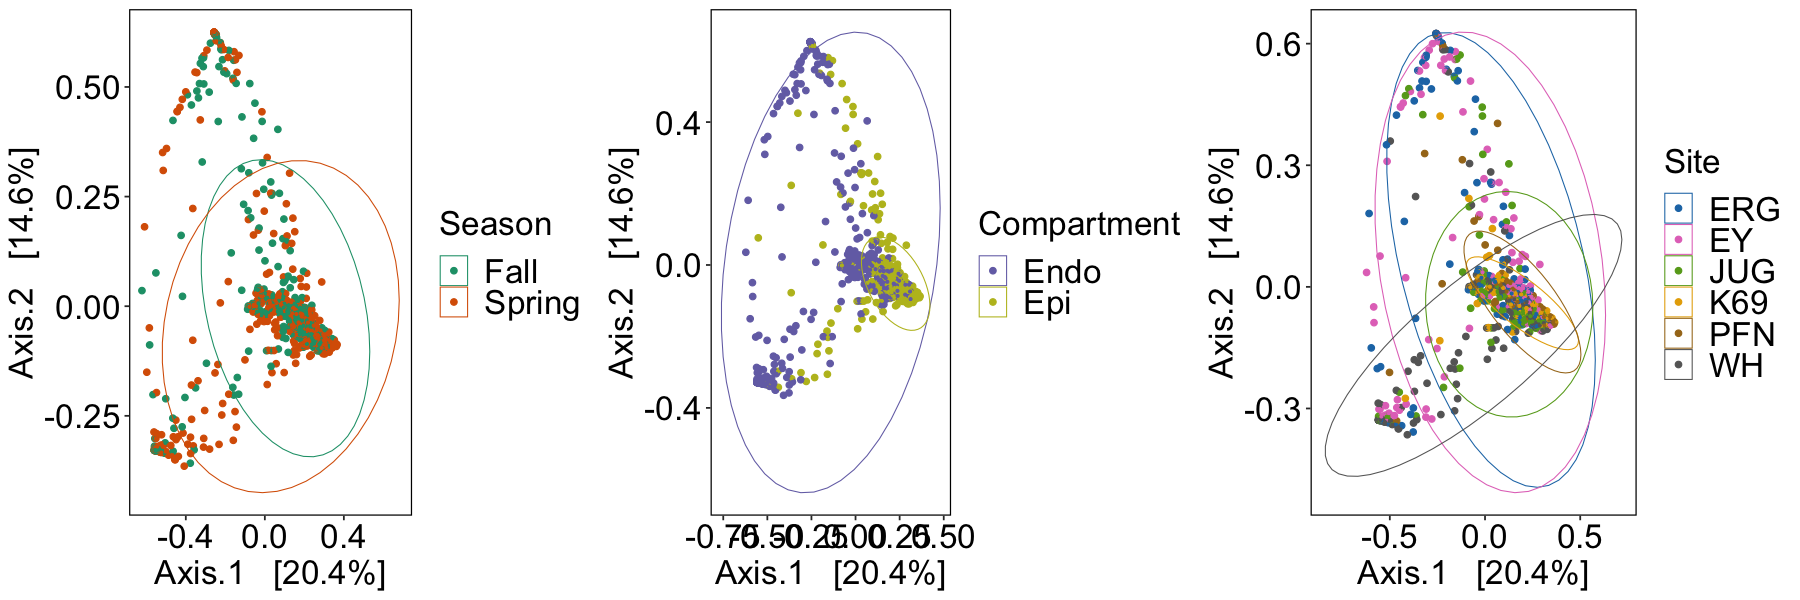

In [9]:
#pcoa plots
Variable <- c("Season" , "Compartment" , "Site")
methods <- c('PCoA')
counter = 6
c = 0
for (method in methods){
  file.ord <- ordinate(file,method, "bray") 
  for (i in 1:length(Variable)){
    counter = counter + 1
    c = c + 1
    color1 = color[c((c*2):length(color))]
    p = plot_ordination(file, file.ord, type="Samples", color=Variable[i]) + 
      theme_bw()+ 
      theme(legend.text = element_text(colour="black", size = 20),
            legend.title = element_text(face = NULL),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            text = element_text(size = 20) ,  
            panel.border = element_rect(colour = "black", fill=NA, size=0.7) ,
            axis.title.x = element_text(colour = "black" , size = 20) , 
            axis.text.x = element_text(colour = "black" , size = 20) , 
            axis.text.y = element_text(colour = "black" , size = 20) , 
            axis.title.y = element_text(colour = "black" ,size = 20),
            strip.text = element_text(colour = "black" ,size = 20)) + geom_point( size = 0.5) +
      scale_color_manual(values = color1) 
    p1 = p + stat_ellipse(aes_string(fill=Variable[i] , size = 3),geom = "polygon", type="t", alpha=0 , size = 0.3)  
    plot_list[[counter]] <- p1
  }
}

options(repr.plot.width=15, repr.plot.height=5)
print('Eukaryotes pcoa plots')
grid.arrange(grobs = plot_list[c(7:9)], nrow = 1, ncol = 3 , align="hv" )

null device 
          1

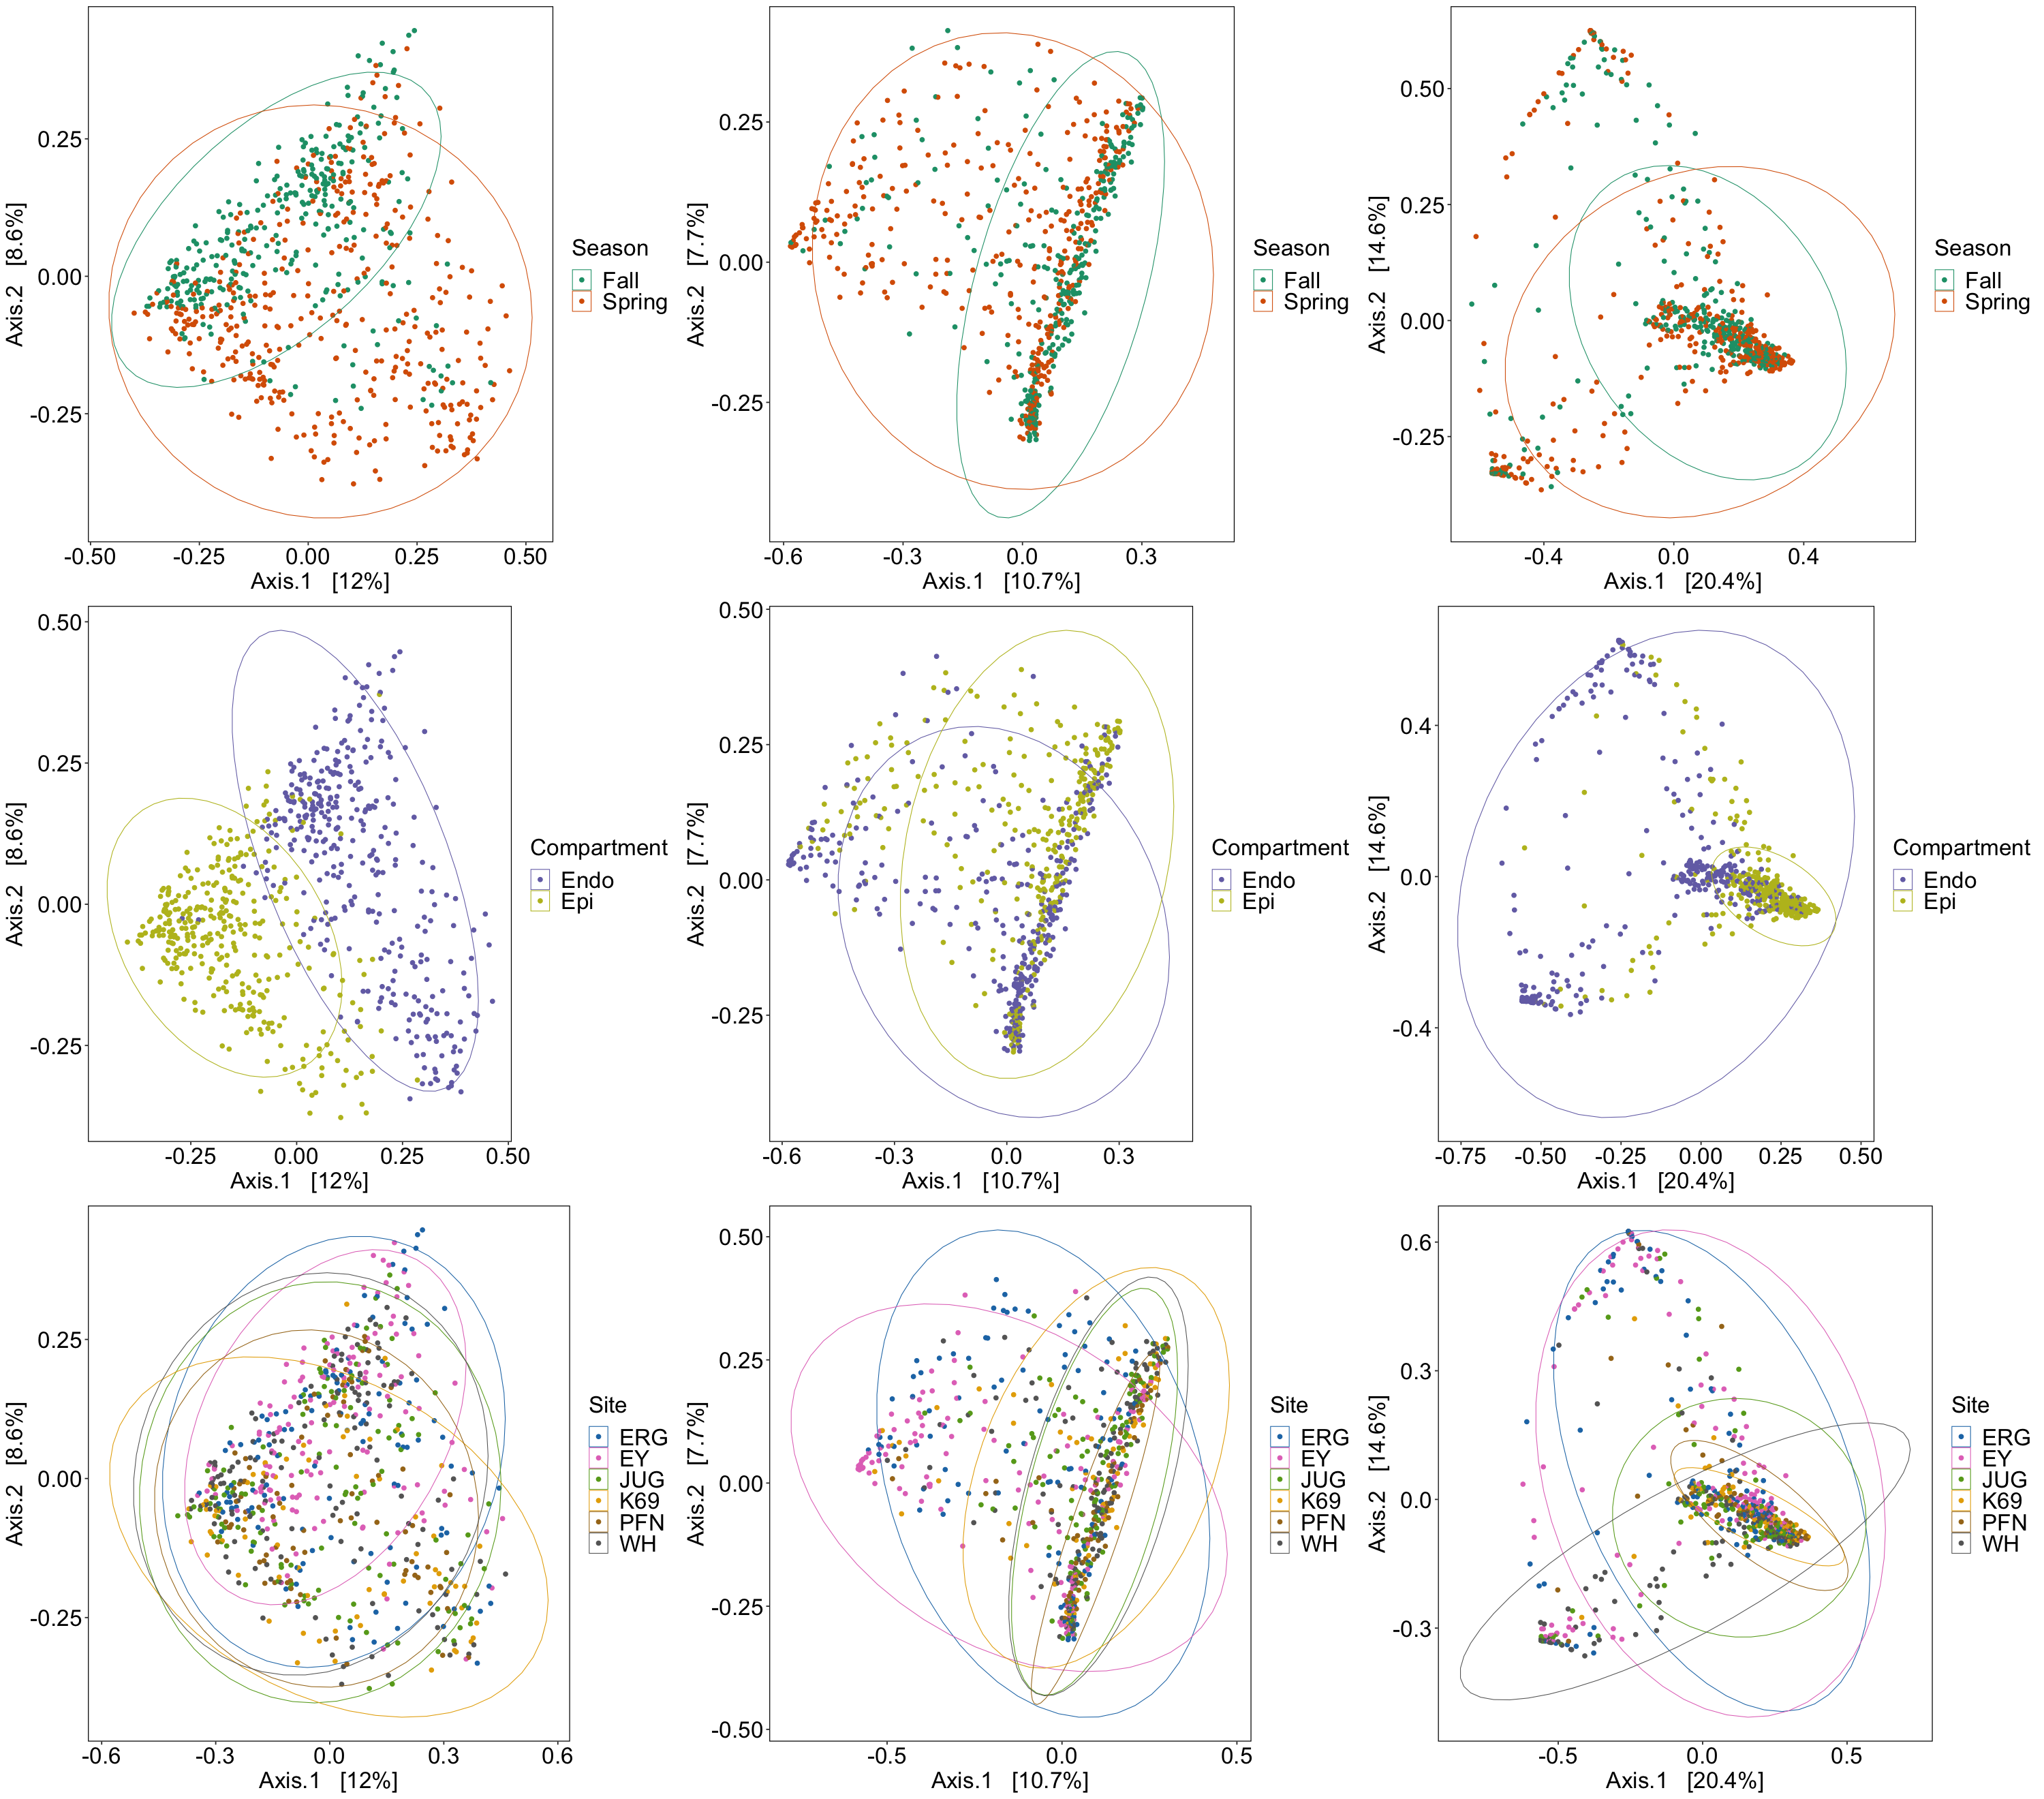

In [22]:
options(repr.plot.width=25, repr.plot.height=22)
ggsave("plots/PCoA.pdf",grid.arrange(grobs = plot_list[c(1,4,7,2,5,8,3,6,9)], nrow = 3, ncol = 3 , align="hv" ), width = 23 , height = 16)

dev.off()

In [35]:
#combine permanova results
write.table(rbind(ado1tabB,ado1tabF,ado1tabE),'plots/permanova_ecologicalfactors.csv',quote = FALSE , sep = "," , col.names = NA)
